# Classification

In [2]:
## Import dataset - MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X, y = mnist['data'], mnist['target']
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

There are 70,000 images each with 784 features.  This is because each image is 28x28 pixels and each feature simply represents a pixel's intensity, from 0 (white) to 255 (black).

Let's look at a single instance's (row's) feature vector, reshape it to 28x28 array, and display it using Matplotlib's imshow() function:

This instance looks like:


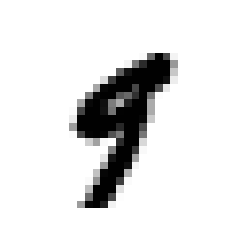

The label is a: 9


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

print("This instance looks like:")
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

print(f"The label is a: {y[36000]}")

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let's shuffle the training, this will guarantee that all cross-validation folds will be similar.  Some Machine Learning algorithms are sensitive to the order of the training instances.

In [8]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier

Let's try the a more basic problem for now: Try to identify only one digit - for example whether the data represents a 5 or not.  This "5-detector" will be an example of a _binary classifier_ . 

In [13]:
y_train_5 = (y_train == '9') # True for all 9s, False for all other digits.
y_test_5 = (y_test == '9')

Now let's pick a classifier and train it.  A good place to start is with a _Stochastic Gradient Descent_ (SGD) classifier, like SGDClassifier class.

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

Looks like the classifier guessed this one correctly!  Now lets evaluate this model's performance.

### Performance Measures

#### Measuring Accuracy using Cross-Validation

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

C:\Users\WilliamThurston\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9459
0.9444
0.9178


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9459, 0.9444, 0.9178])

In [19]:
from sklearn.base import BaseEstimator

class never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))
    
never_5_clf = never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9017 , 0.9021 , 0.89875])